In [1]:
import matplotlib.pyplot as plt
from collections import Counter

## Timeset

In [2]:
from src.data import load_timeset

/home/ubuntu/projects/temporal_classifier/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
testset = load_timeset("test")
validset = load_timeset("valid")

### Test Labels Distribution

In [4]:
valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

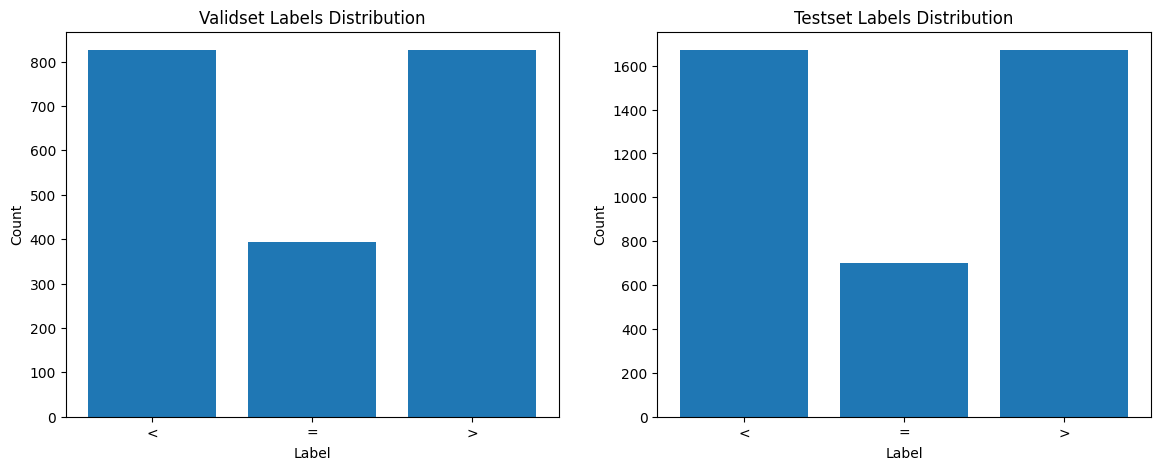

In [5]:
label_order = sorted(valid_labels_counter.keys())

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].bar(label_order, [valid_labels_counter[label] for label in label_order])
axs[0].set_title("Validset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].bar(label_order, [test_labels_counter[label] for label in label_order])
axs[1].set_title("Testset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")
plt.show()

### Example Questions

In [6]:
print("Context:\n", testset[0]["text"])
print()
print("Label:\n", testset[0]["label"])

Context:
 Twelve-year journey of Rosetta ends; spacecraft crashes into comet
Monday, October 3, 2016 
On Friday, European Space Agency's (ESA) spacecraft Rosetta ended its mission, <start_source>crashing</start_source> into Jupiter-family comet 67P/Churyumov–Gerasimenko. Rosetta is the first spacecraft to orbit a comet; it traveled in space for twelve years and about eight billion kilometres (about five billion miles).
The ESA's Darmstadt, Germany control centre <start_target>ceased</start_target> to receive signals from the spacecraft, confirming the Rosetta mission's end, at 11:19 UTC. Mission controllers said it was traveling about 90 centimeters per second on impact (two miles per hour), about a walking pace.
Almost two years ago, in November 2014, Rosetta successfully landed a probe called Philae onto 67P/Churyumov–Gerasimenko, with amongst its goals better understanding how the Solar System was formed. Philae's discoveries included the presence of molecular oxygen and nitrogen on

Check the number of tokens.

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")

In [8]:
validset = validset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})
testset = testset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})

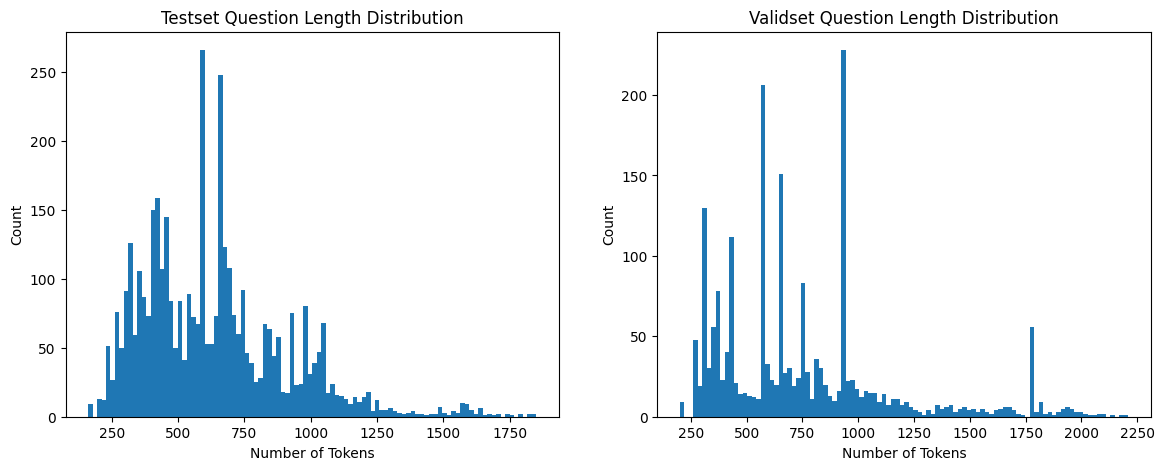

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(testset["n_tokens"], bins=100)
axs[0].set_title("Testset Question Length Distribution")
axs[0].set_xlabel("Number of Tokens")
axs[0].set_ylabel("Count")

axs[1].hist(validset["n_tokens"], bins=100)
axs[1].set_title("Validset Question Length Distribution")
axs[1].set_xlabel("Number of Tokens")
axs[1].set_ylabel("Count")

plt.show()

## Temporal Questions


In [10]:
from src.data import load_temporal_questions

In [11]:
trainset = load_temporal_questions("train", config="raw")
validset = load_temporal_questions("valid", config="raw")
testset = load_temporal_questions("test", config="raw")

### Labels Distribution

In [12]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

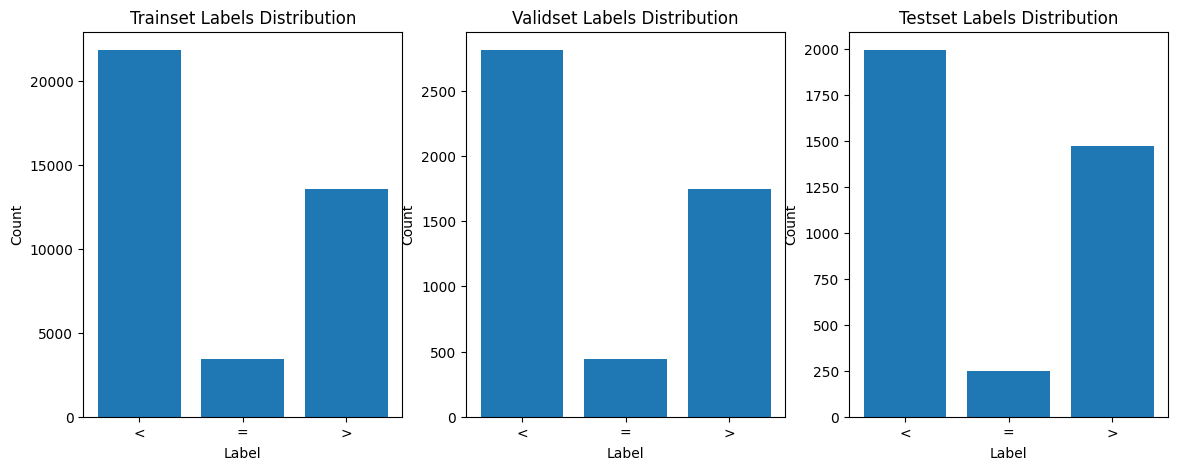

In [13]:
label_order = sorted(train_labels_counter.keys())

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
axs[0].bar(label_order, [train_labels_counter[label] for label in label_order])
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].bar(label_order, [valid_labels_counter[label] for label in label_order])
axs[1].set_title("Validset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")

axs[2].bar(label_order, [test_labels_counter[label] for label in label_order])
axs[2].set_title("Testset Labels Distribution")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Count")
plt.show()

### Example

In [14]:
print("Text:\n", testset[0]["text"])
print()
print("Label:\n", testset[0]["label"])

Text:
 Documents creation time: March 22, 2013
Israeli Prime Minister Benjamin Netanyahu apologized on Friday to Turkish Prime Minister Recep Tayyip Erdogan for a raid on a Turkish flotilla ship, a move that will help restore strained ties between the countries.
The call, which happened as President Barack Obama wrapped up his first presidential <end_source>visit</end_source> to Israel, was an unexpected <end_target>outcome</end_target> from a Mideast trip that seemed to yield few concrete steps.
Mr. Netanyahu's office confirmed that the Israeli leader, in a conversation with Mr. Erdogan, "agreed to restore normalization between Israel and Turkey, including the dispatch of ambassadors and the cancellation of legal steps against [Israeli Defense Forces] soldiers." Mr. Erdogan accepted the Israeli apology, the prime minister's office said.
Mr. Erdogan has long sought an apology for the raid in May 2010 on the Mavi Marmara, which was part of a flotilla that sought to break Israel's blocka

#### Check Contexts are Unique

In [15]:
print("Trainset length:", len(trainset["text"]))
print("Trainset unique length:", len(set(trainset["text"])))

print("Validset length:", len(validset["text"]))
print("Validset unique length:", len(set(validset["text"])))

print("Testset length:", len(testset["text"]))
print("Testset unique length:", len(set(testset["text"])))

Trainset length: 38796
Trainset unique length: 38796
Validset length: 5000
Validset unique length: 5000
Testset length: 3716
Testset unique length: 3712


Check the number of tokens.

In [16]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")

In [17]:
trainset = trainset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})
validset = validset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})
testset = testset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})

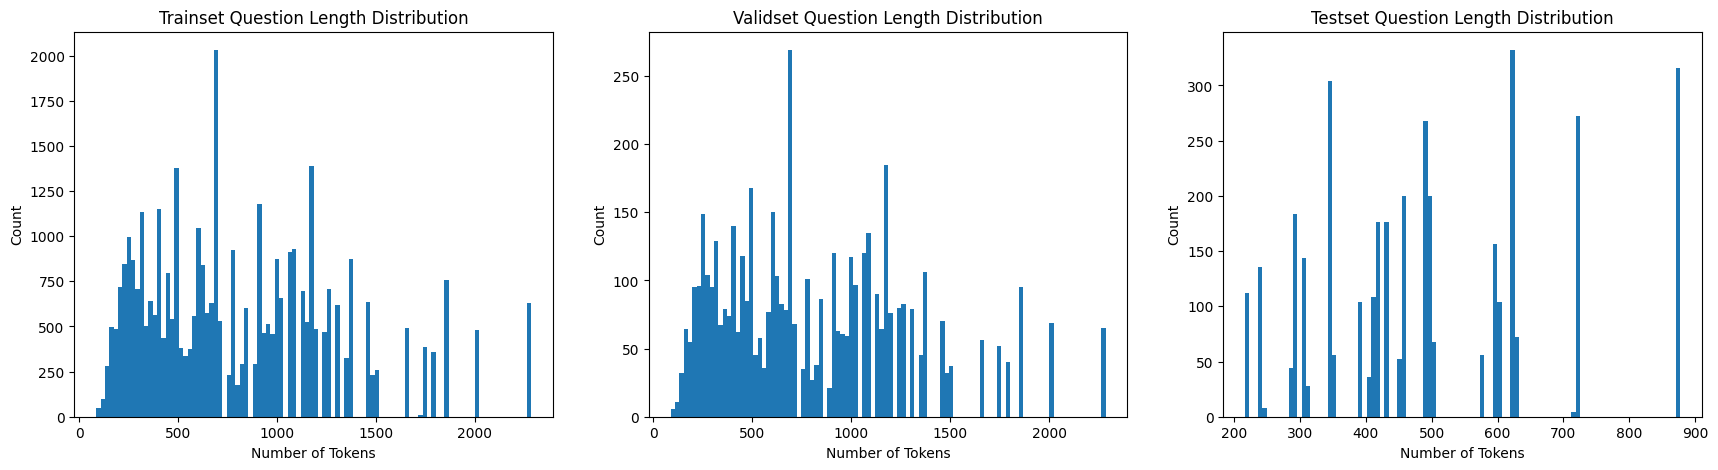

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(21, 5))
axs[0].hist(trainset["n_tokens"], bins=100)
axs[0].set_title("Trainset Question Length Distribution")
axs[0].set_xlabel("Number of Tokens")
axs[0].set_ylabel("Count")

axs[1].hist(validset["n_tokens"], bins=100)
axs[1].set_title("Validset Question Length Distribution")
axs[1].set_xlabel("Number of Tokens")
axs[1].set_ylabel("Count")

axs[2].hist(testset["n_tokens"], bins=100)
axs[2].set_title("Testset Question Length Distribution")
axs[2].set_xlabel("Number of Tokens")
axs[2].set_ylabel("Count")
plt.show()

## MATRES


In [31]:
from src.data import load_matres

In [32]:
trainset = load_matres("train")
testset = load_matres("test")

100%|██████████| 275/275 [00:00<00:00, 643.55it/s]


### Labels Distribution

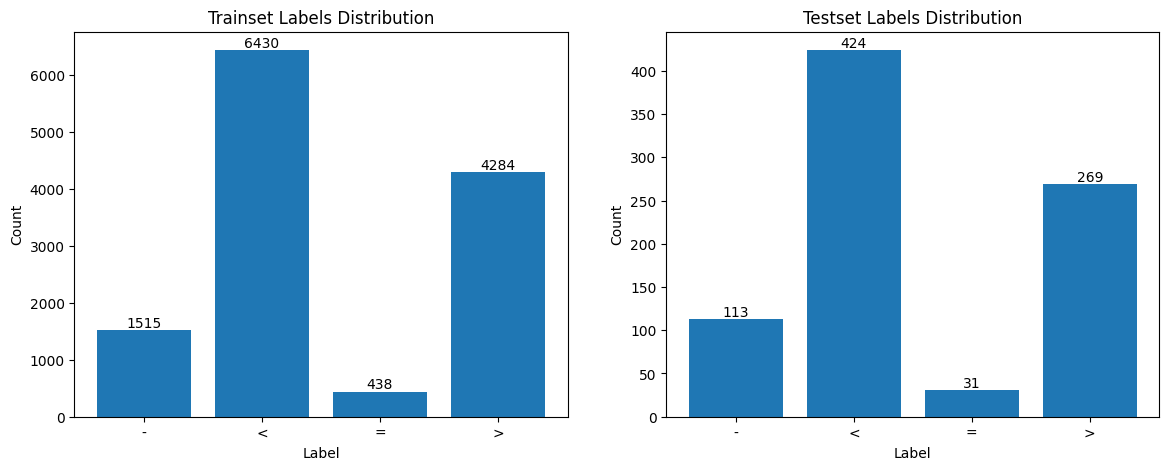

In [33]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

label_order = sorted(train_labels_counter.keys())

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].bar(label_order, [train_labels_counter[label] for label in label_order])
for i, v in enumerate([train_labels_counter[label] for label in label_order]):
    axs[0].text(i, v, str(v), ha="center", va="bottom")
axs[0].set_title("Trainset Labels Distribution")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Count")

axs[1].bar(label_order, [test_labels_counter[label] for label in label_order])
for i, v in enumerate([test_labels_counter[label] for label in label_order]):
    axs[1].text(i, v, str(v), ha="center", va="bottom")
axs[1].set_title("Testset Labels Distribution")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Count")
plt.show()

### Example

In [22]:
print("Text:\n", testset[0]["text"])
print()
print("Label:\n", testset[0]["label"])

Text:
 Documents creation time: March 22, 2013
Israeli Prime Minister Benjamin Netanyahu <start_source>apologized</start_source> on Friday to Turkish Prime Minister Recep Tayyip Erdogan for a raid on a Turkish flotilla ship, a move that will help restore strained ties between the countries.
The call, which <start_target>happened</start_target> as President Barack Obama wrapped up his first presidential visit to Israel, was an unexpected outcome from a Mideast trip that seemed to yield few concrete steps.
Mr. Netanyahu's office confirmed that the Israeli leader, in a conversation with Mr. Erdogan, "agreed to restore normalization between Israel and Turkey, including the dispatch of ambassadors and the cancellation of legal steps against [Israeli Defense Forces] soldiers." Mr. Erdogan accepted the Israeli apology, the prime minister's office said.
Mr. Erdogan has long sought an apology for the raid in May 2010 on the Mavi Marmara, which was part of a flotilla that sought to break Israel'

#### Check Contexts are Unique

In [23]:
print("Trainset length:", len(trainset["text"]))
print("Trainset unique length:", len(set(trainset["text"])))

print("Testset length:", len(testset["text"]))
print("Testset unique length:", len(set(testset["text"])))

Trainset length: 12667
Trainset unique length: 12667
Testset length: 837
Testset unique length: 837


Check the number of tokens.

In [24]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")

In [25]:
trainset = trainset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})
testset = testset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})

Map:   0%|          | 0/12667 [00:00<?, ? examples/s]

Map: 100%|██████████| 837/837 [00:00<00:00, 1261.42 examples/s]


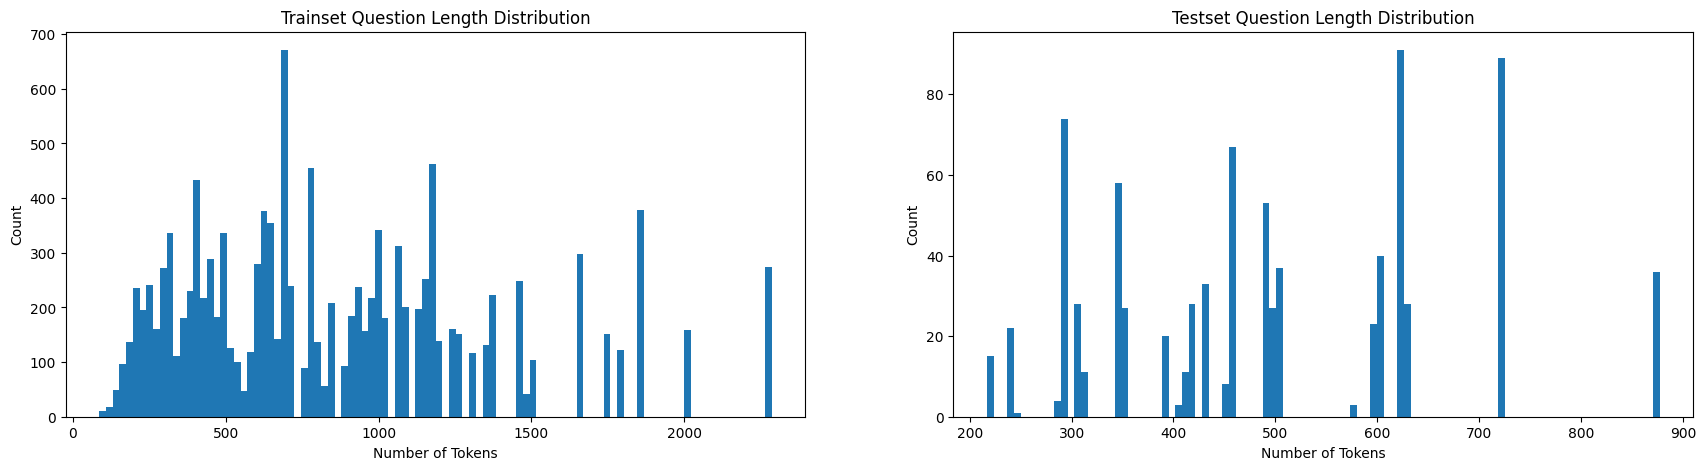

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(21, 5))
axs[0].hist(trainset["n_tokens"], bins=100)
axs[0].set_title("Trainset Question Length Distribution")
axs[0].set_xlabel("Number of Tokens")
axs[0].set_ylabel("Count")

axs[1].hist(testset["n_tokens"], bins=100)
axs[1].set_title("Testset Question Length Distribution")
axs[1].set_xlabel("Number of Tokens")
axs[1].set_ylabel("Count")
plt.show()

# Interval Benchmarks

### TempEval-3

In [27]:
import tieval.datasets

corpus = tieval.datasets.read("tempeval_3")

all_labels = [tl.relation.interval for doc in corpus.documents for tl in doc.tlinks]
unique_labels = list(set(all_labels))
test_docs = corpus.test

100%|██████████| 275/275 [00:00<00:00, 442.62it/s]


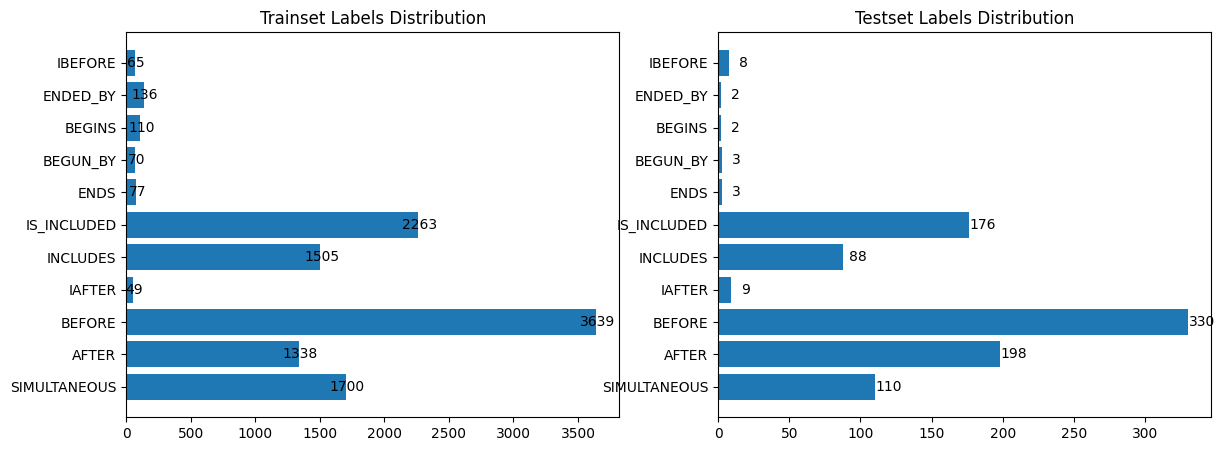

In [28]:
train_labels = [tl.relation.interval for doc in corpus.train for tl in doc.tlinks]
train_label_counter = Counter(train_labels)

test_labels = [tl.relation.interval for doc in test_docs for tl in doc.tlinks]
test_label_counter = Counter(test_labels)
# set the order of the test labels to be the same as the train labels
test_label_counter = {
    label: test_label_counter[label] for label in train_label_counter.keys()
}

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].barh(train_label_counter.keys(), train_label_counter.values())
axs[0].set_title("Trainset Labels Distribution")

# add the number to the bars
for i, v in enumerate(train_label_counter.values()):
    axs[0].text(v + 10, i, str(v), ha="center", va="center")

axs[1].barh(test_label_counter.keys(), test_label_counter.values())
axs[1].set_title("Testset Labels Distribution")
# add the number to the bars
for i, v in enumerate(test_label_counter.values()):
    axs[1].text(v + 10, i, str(v), ha="center", va="center")
plt.show()

In [29]:
unique_labels

['AFTER',
 'BEFORE',
 'IS_INCLUDED',
 'BEGUN_BY',
 'SIMULTANEOUS',
 'IAFTER',
 'ENDED_BY',
 'IBEFORE',
 'ENDS',
 'BEGINS',
 'INCLUDES']